## Part 7: For-loops, if-statements and pretty plots

_______________
*This is a translated version of Part 7 of the intro course to programming in Python written for Ekte Data ("Real Data"). Take a look at our [GitHub](https://github.com/julienweihs/GEOF/tree/main) for more exercises for working with real data in Python. Also, we're working on translating all exercises, but we're not quite done yet, so some of the links still go to exercises in norwegian.*

*-- Vår Dundas, 2023*
_______________________

In this exercise, we first look at **for-loops** and then **if-else statements**. 

**for-loops** are called this because the syntax translates to "for these scenarios, do this". This is practical when you want to do almost the same thing several times, e.g., find the trend for each 20-year period of a 200 year long data set. Or if you want to plot all these trend lines. Or maybe you have spatial data and you want to estimate the correlation between two variables in every spatial point. 

**if-statements** are useful if you only want to do an operation if a criteria is met, or if different conditions require different treatment. The syntax translates to "if this is the case, do that", e.g., "" or "if the value is more than 1000 print out the value". 

**Scatterplot** bruker vi tid på fordi dette er en enkel og veldig beskrivende metode for å se etter sammenhenger mellom to eller tre variabler. Flere av NAT624-studentene sammenlignet hverandres datasett og værmeldingen sine data i innleveringene sine. Noen av sammenlignet også med datasett over andre variabler enn temperatur, lastet ned fra f.eks. seklima.met.no. Å sammenligne to tidsserier kan gi mye informasjon, men scatterplot konsenterer sammenhenger på en litt annen måte som kan være nyttig. 

---------------



In [3]:
import numpy as np # mathematical operations etc
import matplotlib.pyplot as plt # for figures

import sys
# !!! Replace W:\Work\Documents\GEOF_UiB\Python with the path 
# on YOUR PC !!! 
# One clean way to do this is to locate your EkteDataFunk.py-file, 
# right-click it, and use the 'Copy Path' command
sys.path.append(r"W:\Work\Documents\GEOF_UiB\Python")
from EkteDataFunk import loadData # to load data

In [4]:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [5]:
file='TempBergenYearlyNonan.txt'
temp,time = loadData(file)

In [6]:
time.shape, np.squeeze(temp).shape

((160,), (160,))

In [7]:
temp=np.squeeze(temp)

As always, start with plotting the data.

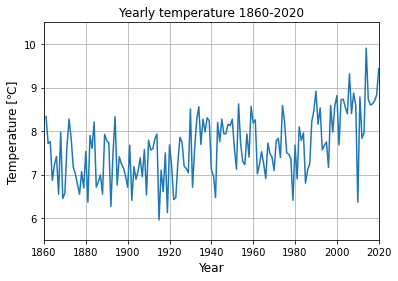

In [8]:
ax=plt.axes() # Make axes to plot in

# Plot the time series
ax.plot(time, temp)

# Define grid, labels etc.
ax.set(
    title='Yearly temperature 1860-2020',
    xlabel='Year',
    ylabel='Temperature [\u2103]', 
    xlim=[1860,2020], # limit the x-axis
    ylim=[5.5,10.5] # limit the y-axis
) 
ax.grid() # add a grid in the background
plt.show() 

## Section 1

The previous exercise brought us here: We're trying to split the time period into four equal parts, but our indices are floats, and we want to convert them into integers in a tidy way. 

In [16]:
index=[
    0, 
    len(time)*1/4, 
    len(time)*2/4, 
    len(time)*3/4,
    len(time)
]

time[index]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

The easiest way to convert all the elements in the vector `index` to integers is to use a **for-loop**.
This is practical when you want to do almost the same thing several times. 

*NOTE: There is also a larger exercise dedicated to for-loops for more practice: [Nedbørsoppgaven_Del5_forløkke.ipynb](https://github.com/irendundas/EkteData/blob/main/Nedb%C3%B8rsoppgaven/Del5_Forl%C3%B8kke.ipynb).*

## Loop through a given number of times: for i in range(x):

Here's a simple examples, just to explain the syntax:

In [10]:
for ind in range(6): # range(6) are all the integers from 0 to 5, i.e., 6 integers.
    print(ind)

0
1
2
3
4
5


In [11]:
# range(6) are all the integers from 0 to 5, i.e., 6 integers.
list(range(6))

[0, 1, 2, 3, 4, 5]

The for-loop above just printed out one element from `range(6)` at the time. 
We can do this with our real data as well:

In [12]:
# Print out the first 6 values of "temp"
for i in range(6):
    print(temp[i])

8.336363636363636
7.716666666666666
7.758333333333334
6.866666666666667
7.2250000000000005
7.416666666666668


In [13]:
# Check that you printed out the correct values:
temp[:6]

array([8.33636364, 7.71666667, 7.75833333, 6.86666667, 7.225     ,
       7.41666667])

In [14]:
# For each index [0, 1, 2, 3], print out the temperature pluss the temperature witht the next index
# i.e., if the index is 2, add temp[2] and temp[2+1]=temp[3]

for k in range(4):
    print(temp[k]+temp[k+1])

16.0530303030303
15.475
14.625
14.091666666666669


In [15]:
# Check that it's correct:
print(temp[0]+temp[0+1])
print(temp[1]+temp[1+1])
print(temp[2]+temp[2+1])
print(temp[3]+temp[3+1])

16.0530303030303
15.475
14.625
14.091666666666669


### Exercise 1
Use a for-loop to write out temperatur + the mean temperature for the 10 first temperature values.

## Section 2: Back to the original issue with the indices

For-loops do one operation several times. The number of times is decided in the first line: `for i in range(x)` means that the operation should be done x times. E.g., `range(5)` iterates from 0 to and including 4, i.e., 5 iterations. `i` is `0` in the first iteration, `1` in the next iteration, etc.

In [17]:
index

[0, 40.0, 80.0, 120.0, 160]

In [18]:
for i in range(len(index)): # len(index)=5, so this equals "for i in range(5):"
    index[i]=int(index[i])  # convert one element of index to an integer at the time. 
    print('i=',i,', index[i]=',index[i]) # Print out the result

index # Write out what "index" looks like now. Compare to the result of the previous cell. 

i= 0 , index[i]= 0
i= 1 , index[i]= 40
i= 2 , index[i]= 80
i= 3 , index[i]= 120
i= 4 , index[i]= 160


[0, 40, 80, 120, 160]

We can now compare the four 40-year periods by, e.g., comparing the average of each period.

In [21]:
for i in range(4):
    mean=np.mean(temp[index[i]:index[i+1]]) # Average of the period from index[i] to index[i+1]
    mean=np.round(mean,2) # Round down to 2 decimals
    print('Average temp for period nr.', i, '=', mean) # print the result

Average temp for period nr. 0 = 7.26
Average temp for period nr. 1 = 7.37
Average temp for period nr. 2 = 7.65
Average temp for period nr. 3 = 8.23


The mean temperature for the last 40-year perios is a full degree warmer than the mean temperature for the first 40-year period.

We can also compare the four 40-year periods by plotting them in a figure:

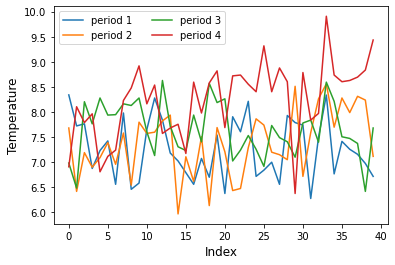

In [24]:
plt.plot(temp[index[0]:index[1]], label='period 1')
plt.plot(temp[index[1]:index[2]], label='period 2')
plt.plot(temp[index[2]:index[3]], label='period 3')
plt.plot(temp[index[3]:index[4]], label='period 4')
plt.legend(ncol=2)
plt.ylabel('Temperature')
plt.xlabel('Index')
plt.show()

Notice that the code cell above has four almost identical code lines. This is a hint that a for-loop might be useful. In this case, four lines is shortened to two lines, and the risk of typos is reduced. 

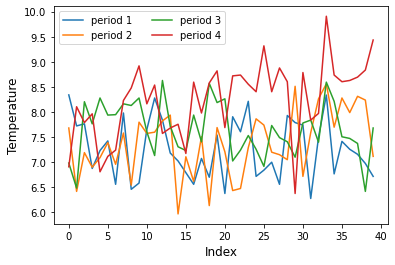

In [27]:
for i in range(4):
    plt.plot(temp[index[i]:index[i+1]], label='period '+str(i+1))
plt.legend(ncol=2)
plt.ylabel('Temperature')
plt.xlabel('Index')
plt.show()


## Section 3: Loop through the actual values in an array

Note: The label above is written as `label='period '+str(i+1)`. This shows how you can combine variables and strings into one long string. By writing `str(x)` you convert x to a string, and you can add strings the with `+`-sign. 

In the examples above we've used `for in in range(x)`. When using this syntax `i` is the index of each iterations. However, `i` can also be actual values as in the example below:

In [28]:
for val in index: 
    print(val)

# Check that it's the same:
index

0
40
80
120
160


[0, 40, 80, 120, 160]

By using this syntax you can make the for-loop used in the plot above tidier:

In [29]:
# Find the length of each of the four equal time periods:
diff=int(len(time)/4) # Because we know we've divided the time series into four equal periods:
diff

40

In [31]:
# This would also work since we know our index starts at 0
diff=index[1]
diff

40

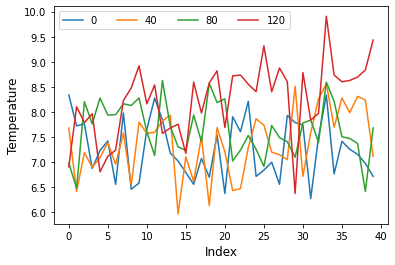

In [32]:
for ind in index[:-1]: # Recall: this means index until but not including the last index. 
    plt.plot(temp[ind:ind+diff], label=str(ind))
plt.legend(ncol=4)
plt.ylabel('Temperature')
plt.xlabel('Index')
plt.show()

In [33]:
# In the code cell above, we run through the actual values of "index"
for ind in index[:-1]:
    print(ind)

0
40
80
120


In [37]:
# Also note that in the figure above the legende is the actual index values, 0, 40, 80, 120. 
# These are not very good legend names. We come back to how to get both the iteration number AND 
# the actual value of an array below, using enumerate()

### Exercise 4
- Use a for-loop to divide the time series into 5 equal periods. Estimate the mean of each period


### Exercise 5:
- Use a for-loop to plot all the five periods in the same figure. 

## Section 4: enumerate(): Loop through both the actual value of an array AND the iteration

Sometimes it's practical to **both** loop through the actual values of an array **and** know the index of the iteration. In such cases we use `enumerate` instead of `range`:

In [36]:
for count, val in enumerate(index):
    print('count:', count, 'val:', val)

# Count is the iteration, 0 to 4
# val is the actual value in the vector "index", 0, 40, ..., 160

count: 0 val: 0
count: 1 val: 40
count: 2 val: 80
count: 3 val: 120
count: 4 val: 160


By using enumerate() we can do all the steps above in one for-loop. 1) convert to integers, 2) plot the periods, 3) get a sensible legend.

In [39]:
index=[
    0, 
    len(time)*1/4, 
    len(time)*2/4, 
    len(time)*3/4,
    len(time)
]
index

[0, 40.0, 80.0, 120.0, 160]

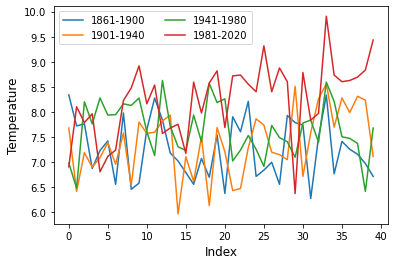

In [47]:
for count, val in enumerate(index[:-1]):
    ind=int(val) # convert the index to an integer
    # make a string that looks like this: startyear - stopyear
    label=str(int(time[ind]))+'-'+str(int((time[ind+diff-1])))
    plt.plot(temp[ind:ind+diff], label=label)

plt.legend(ncol=2)
plt.ylabel('Temperature')
plt.xlabel('Index')
plt.show()    


## Section 5: a for-loop with many iterations. Introducing np.arange() and np.linspace()

To make the advantage with for-loops clearer: What if you want to estimate the average and standard deviation for every 10-year period, and make a figure with all these values? That will be 16 averages and 16 stndard deviations for our data set.

First we need a new array with indices:

In [48]:
diff=10 # Since we know we want to look at 10year periods.

# np.arange() uses the syntax: np.arange(start, stop, step).
index=np.arange(0, len(time), diff) 
index

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150])

In [52]:
# In this case we could also use np.linspace() since we also know how many time periods we're after:
# np.linspace() uses the syntax: np.linspace(start, stop, N), where N is the number of values. 
np.linspace(0, len(time), 17)

# Note that this also gives us the end-index, which we don't really need, 
# and that np.arange() gave integers directly, and np.linspace() gave floats. 
# Because of this we use np.arange here.

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
       110., 120., 130., 140., 150., 160.])

In [53]:
time[int(30+10/2)]

1896.0

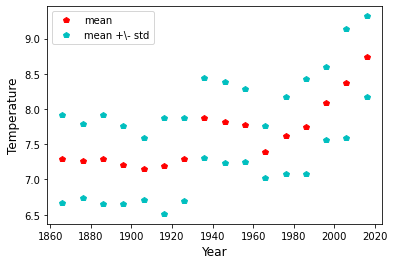

In [54]:
for count, val in enumerate(index): # loop through the elements of index and count the iterations.
    # When e.g. val=30, the line below is: np.mean(temp[30:30+10]).
    # This is ten-year period nr 4, so count=4. 
    mean=np.mean(temp[val:val+diff]) 
    std=np.std(temp[val:val+diff])
    
    # We want to plot the points in the middle of the period they represent, i.e., we want
    # to plot the value for the period from year 30 to 40 at index 35.
    # E.g., when val=30, the below equald time[int(30+10/2)]=1896.0
    time_mean=time[int(val+diff/2)] 

    # Plot the mean as red pentagons.
    plt.plot(time_mean, mean, 'rp')
    # plot +\- standard deviation as cyan pentagons. 
    plt.plot(time_mean, mean+std, 'cp')
    plt.plot(time_mean, mean-std, 'cp')

    
# NOTE: if we assigned label-names in the plotting lines above (inside the for-loop), every point
# would have a legend-entry, which is not necessary. 
# Instead, plot NaN-points that do not show up but with the same marker style as the actual points. 
# This gives a tidy legend with only the necessary informaiton. 
plt.plot(np.nan, np.nan, 'rp', label='mean')
plt.plot(np.nan, np.nan, 'cp', label='mean +\- std')
plt.legend()

plt.ylabel('Temperature')
plt.xlabel('Year')
plt.show()

## Section 6: Store values estimated in a for loop for later use 
It will be easier to interpret this figure if we include lines between the points. 
To be able to do this, we have to **stor** the mean and standars deviation values in their own arrays so that we can plot them outside the for-loop.

In [55]:
# Make three arrays that we can fill with values. 
mean=np.zeros(len(index))
std=np.zeros(len(index))
time_mean=np.zeros(len(index))

In [56]:
# loop through index values, and count the iteration
for count, val in enumerate(index):
    # Store the mean of the first period in mean[0], the second period in mean[1], etc. 
    mean[count]=np.mean(temp[val:val+diff])
    # Store the std of the first period in std[0], the second period in std[1], etc. 
    std[count]=np.std(temp[val:val+diff])
    # Same for time_mean
    time_mean[count]=time[int(val+diff/2)]

# Now you have three vectors with information about mean, std, and the time stamp. 
    


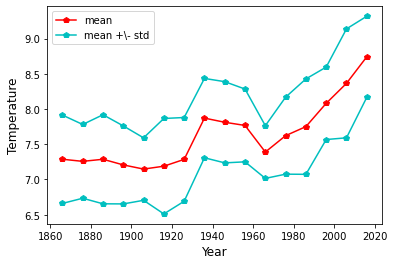

In [59]:
# plot the lines and markers  
plt.plot(time_mean, mean, 'rp', linestyle='-', label='mean')
plt.plot(time_mean, mean+std, 'cp', linestyle='-', label='mean +\- std')
plt.plot(time_mean, mean-std, 'cp', linestyle='-')

plt.ylabel('Temperature')
plt.legend()
plt.xlabel('Year')
plt.show()

The only difference from the previous figure is that there are lines between the markers. However, the code is arguable more tidy. 

#### Exercise 5

- Use the method you prefer to divide the time series into 10 periods of equal length.
- Make a figure similar to the ove above.

- Do the same two steps again, but for five time periods of equal length. What information do you get from the different figures? What is most clearly visualized in the first vs the last figure, and vice versa? You e.g., can plot both time series in the same figure if this makes the differences more clear. 

## Section 7: if-statements
If-statements are different from for-loops, but their syntax is similar. It states: 

`if *this* is the case`

- `do *this*` 

`If that's not the case but *this* is the case`

- `do *this*`

`In every other case`
- `do *this*`

In [61]:
diff=3
if diff==3: # If diff equals 3
    print(diff) # print diff

3


In [62]:
if diff==4:
    print(diff)
elif diff > 4:
    print(diff)
else:
    print('diff is not equal or larger than 4')

diff is not equal or larger than 4


If statements are useful in any scenario where you want to treat different conditions differently, or if you want to check for specific cases. 

I our example with temperature data we can use an if-statement to improve the visualization of the temperature evolution. Below we plot red markers whenever the temperature is above the mean, and blue markers whenever the temperature is below the mean:

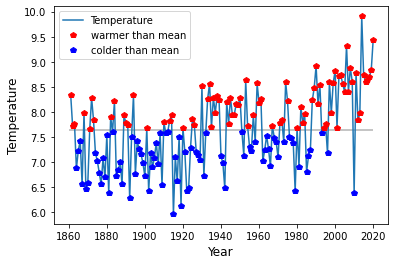

In [64]:
mean=np.mean(temp) # Average temperature during the full time period. 

plt.plot(time, temp, label='Temperature') # Plot the full time series
for count, T in enumerate(temp):
    if T > mean: # If the temperature at the given time is larger than the mean ...
        plt.plot(time[count], T, 'rp') # ... plot a red marker
    elif T < mean: # If the temperature at the given time is less than the mean ...
        plt.plot(time[count], T, 'bp') # ... plot a blue marker

plt.plot(np.nan, np.nan, 'rp', label="warmer than mean")
plt.plot(np.nan, np.nan, 'bp', label='colder than mean')
plt.legend()

plt.hlines(mean, 1860, 2020, 'k', alpha=.3) # Plot a horizontal line to emphasize where the average is
plt.ylabel('Temperature')
plt.xlabel('Year')
plt.show()

This is tidy and intuitive. 

... However, it can also be done with indexing. We have not gone through this yet, but here's a short example to show how it works. 

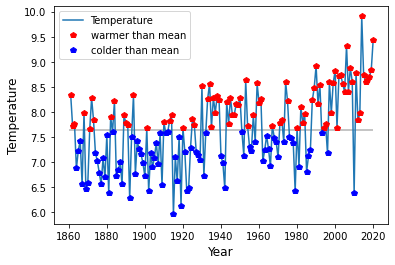

In [65]:
plt.plot(time, temp, label='Temperature') # Plot the full time series
plt.plot(time[temp>mean], temp[temp>mean], 'rp') # If the temperature at the given time is larger than the mean
plt.plot(time[temp<mean], temp[temp<mean], 'bp') # If the temperature at the given time is less than the mean

plt.plot(np.nan, np.nan, 'rp', label="warmer than mean")
plt.plot(np.nan, np.nan, 'bp', label='colder than mean')
plt.legend()

plt.hlines(mean, 1860, 2020, 'k', alpha=.3)
plt.ylabel('Temperature')
plt.xlabel('Year')
plt.show()

In [69]:
# what happens here is that we subselect all temperature values that are less than or larger than the mean. 
temp>mean # larger than mean

array([ True,  True,  True, False, False, False, False,  True, False,
       False,  True,  True,  True, False, False, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False,  True,  True,  True, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True, False, False,  True,  True,
       False, False, False, False, False,  True, False, False, False,
       False,  True,  True, False, False, False,  True, False, False,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True, False, False,  True, False,  True,
        True,  True, False, False, False, False, False,  True, False,
       False, False,  True,  True, False,  True,  True, False, False,
       False, False,  True, False,  True,  True,  True, False, False,
       False,  True,

temp>mean gives an array of `True` and `False`. `True` when the temperature is, in fact, larger than mean, and `False` when the temperature is less. This type of array with True/False is used for *Boolean* indexing. When we write `temp[temp>mean]` and `time[temp>mean]` above, we select all the indices where temp is larger than mean from both the temp and the time array.  

In [73]:
# Look at the ten first selected values to illustrate
print('the average is: ',mean)
print('above average: ',temp[temp>mean][:10])
print('below average: ',temp[temp<mean][:10])

the average is:  7.6283759469696975
above average:  [8.33636364 7.71666667 7.75833333 7.975      7.64545455 8.275
 7.83333333 7.9        8.20833333 7.925     ]
below average:  [6.86666667 7.225      7.41666667 6.55       6.45       6.575
 7.175      7.01666667 6.78333333 6.55      ]


Such methods are super useful. Maybe you want to show or select only wind speeds above 15 m/s to look at extremes, of the oxygen within a density layer in the ocean, or visualize positive and negative anomalies with different colormaps? In this example, using the if/else statement, or the boolean indexing makes it very clear that itæs becoming warmer in Bergen. 

### Exercise 6
Plot a similar figure as the one above, but plot red markers when the temperature is larger than mean+std, and blue markers when the temperature is less than mean-std. 
- Use an if-statement first
- Then do the same with boolean indexing. 

## Del 3: Scatterplot
Tidsserier er ikke den eneste måten å presentere data på! Vi så litt på scatterplots allerede i [Del5_sol_temp_nedbør](https://github.com/irendundas/EkteData/blob/main/NAT624/Del5_sol_temp_nedb%C3%B8r.ipynb), og her ser vi videre på hvordan det kan være hjelpsomt for å undersøke sammenhenger mellom variabler. 

Vi laster inn et nytt datasett: Nedbørsdata.

In [112]:
file='PrecipVestlandYearlyNonan.txt'
precip, tid_p = loadData(file)

file='TempBergenYearlyNonan.txt'
temp,tid_t = loadData(file)

temp=np.squeeze(temp)
precip=np.squeeze(precip)

In [113]:
# undersøk start og slutt til de to tidsseriene
print(tid_p[0])
print(tid_p[-1])
print(tid_t[0])
print(tid_t[-1])

1899.0
2020.0
1861.0
2020.0


In [114]:
# Finn indeksen der tid_t er lik det første året i tid_p
start=np.where(tid_t==tid_p[0]) 
# [0][0] må med for å få tak i kun tallet og ikke alle parantesene rundt
start=start[0][0] 

# Slett starten av temperatur-tidsserien, slik at både temp og nedbør starter
# samme år
temp=temp[start:] 
tid_t=tid_t[start:]

tid_t[0], tid_p[0]

(1899.0, 1899.0)

**Lag et scatterplot**

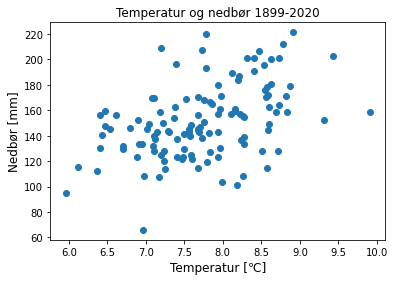

In [115]:
ax=plt.axes()
ax.scatter(temp,precip)
ax.set(
    title='Temperatur og nedbør 1899-2020',
    ylabel='Nedbør [mm]',
    xlabel='Temperatur [\u2103]', # \u2103 er koden for grader celcius. 
) 
plt.show()

Som i oppgaven [Del5_sol_temp_nedbør](https://github.com/irendundas/EkteData/blob/main/NAT624/Del5_sol_temp_nedb%C3%B8r.ipynb) fargekoder vi prikkene.

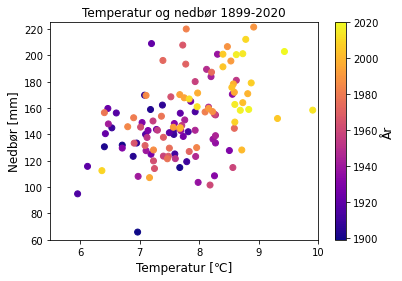

In [116]:
# cmap står for "colormap". Definer hvilken fargeskala du vil bruke. 
cmap=cm.get_cmap('plasma', len(temp)) 

# Definer at fargeskalaen skal basere seg på tidsvektoren din
colors = tid_t 

ax=plt.axes()

# Plot nedbør som en funksjon av temperatur. Fargeskalaen settes til "colors"
# (definert rett over), fargekartet settes til cmap som definert over, 
# og du setter min og maks grenser til fargeksalaen. 
sc=ax.scatter(
    temp, precip,
    c=colors, cmap=cmap,
    vmin=min(colors), vmax=max(colors),
) 
ax.set(
    title='Temperatur og nedbør 1899-2020',
    ylabel='Nedbør [mm]',
    xlabel='Temperatur [\u2103]', # \u2103 er koden for grader celcius. 
    xlim=(5.5, 10), 
    ylim=(60,225)
) 

# Plot fargeskalaen
plt.colorbar(sc, label='År') 

plt.show()

## Del 3, oppgave 6
Hvordan har forholdet mellom temperatur og nedbør endret seg over tid?


Bytt om få skriptet over slik at tid er langs x-aksen, temperatur langs y-aksen, og nedbør er fargekodet. Bruk et annet fargekart enn i figuren over. *Tips: redefiner xlim og ylim*

Hvilken figur synes du viser forholdet mellom nedbør og temperatur best? 

Hvis man hovedsakelig er interessert i for eksempel endring i temperatur med tid, men gjerne vil vise at dette henger sammen med nedbør kan man inkludere tidsserien i scatterplottet. Dette drar oppmerksomheten mot tidsserien, men man kan likevel se at det var tørrere i starten av tidsperioden. 

I linjen `sc=ax.scatter(...)` i cellen under definerer vi et par nye ting: 
- `s=50` gir størrelsen til prikkene (s: size)
- `zorder=2.5` gjør at prikkene kommer oppå linjen. [Default](https://matplotlib.org/stable/gallery/misc/zorder_demo.html) er at linjer kommer oppå prikker: ulike element har bestemte plasser i er plotte-hierarki i matplotlib. Men denne rekkefølgen kan endres ved å oppgi `zorder` (z-order: rekkefølge i z-retning, som tilsvarer lag på figuren).

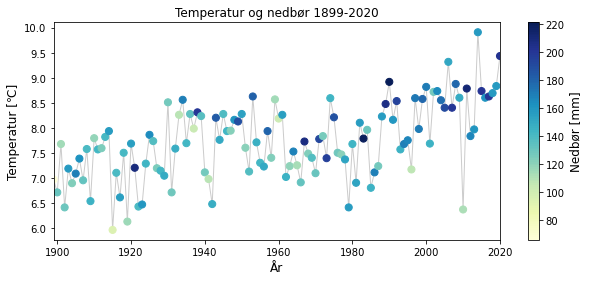

In [117]:
cmap=cm.get_cmap('YlGnBu',len(temp)) 
colors = precip 

# definer størrelsen til figuren, som i oppgaven Del5_sol_temp_nedbør
fig, ax = plt.subplots(figsize=(10,4))

# plot tidsserien
plt.plot(tid_t, temp, linewidth=1, color=[.8, .8, .8])


sc=ax.scatter(
    tid_t, temp,
    s=50,
    c=colors, cmap=cmap,
    vmin=min(precip), vmax=max(precip),
    zorder=2.5
) 
ax.set(
    title='Temperatur og nedbør 1899-2020',
    ylabel='Temperatur [\u2103]',
    xlabel='År', # \u2103 er koden for grader celcius. 
    xlim=(tid_t[0], tid_t[-1])
) 
plt.colorbar(sc, label='Nedbør [mm]') # denne linjen gjør at fargeskalaen vises til høyre. 


plt.show()

Det kan også være nyttig å inkludere linjer for gjennomsnitt og standardavvik.  Dette gjør det er tydelig å hva som er mer enn og mindre enn gjennomsnittet. 

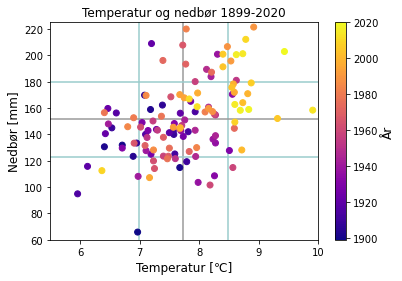

In [118]:
# cmap står for "colormap". Definer hvilken fargeskala du vil bruke. 
cmap=cm.get_cmap('plasma', len(temp)) 

# Definer at fargeskalaen skal basere seg på tidsvektoren din
colors = tid_t 

ax=plt.axes()

# Plot nedbør som en funksjon av temperatur. Fargeskalaen settes til "colors"
# (definert rett over), fargekartet settes til cmap som definert over, 
# og du setter min og maks grenser til fargeksalaen. 
sc=ax.scatter(
    temp, precip,
    c=colors, cmap=cmap,
    vmin=min(colors), vmax=max(colors),
    zorder=2.5
) 
ax.set(
    title='Temperatur og nedbør 1899-2020',
    ylabel='Nedbør [mm]',
    xlabel='Temperatur [\u2103]', # \u2103 er koden for grader celcius. 
    xlim=(5.5, 10), 
    ylim=(60,225), 
) 

# Plot fargeskalaen
plt.colorbar(sc, label='År') 

# Inkluder linjer for gjennomsnitt og standardavvik. 
plt.vlines(np.mean(temp), 60, 225, color=[.6, .6, .6])
plt.vlines(np.mean(temp)+np.std(temp), 60, 225, color=[.6, .8, .8])
plt.vlines(np.mean(temp)-np.std(temp), 60, 225, color=[.6, .8, .8])
plt.hlines(np.mean(precip), 5.5, 10, color=[.6, .6, .6])
plt.hlines(np.mean(precip)+np.std(precip), 5.5, 10, color=[.6, .8, .8])
plt.hlines(np.mean(precip)-np.std(precip), 5.5, 10, color=[.6, .8, .8])
plt.show()


## Del 3, oppgave 7
La temperatur definere fargeskalane og lag et nytt scatterplot. 
Prøv deg frem for å vise tydlig en sammenheng du vil fokusere på. 
- Vil du inkludere tidslinjen?
- Hvilket fargekart vil du bruker?
- Størrelse på prikkene?
- Rekkefølge på elementene i figuren?
- Hvilke variabler langs x- og y-aksene?
- Linjer for gjennomsnitt/standardavvik?